In [ ]:
# import tensorflow as tf
# from tensorflow.python.client import device_lib
# from keras import backend as K
import numpy as np
import pandas as pd
# import cuml.LogisticRegression

In [51]:
df= pd.read_csv("./final_cleaned_data.csv")
df

,Unnamed: 0,hatespeech,text,preprocess_data,word_tfidf
0,0,0.0,Yes indeed. She sort of reminds me of the elde...,"['yes', 'indeed', 'sort', 'remind', 'eld', 'la...","{'yes': 1, 'indeed': 1, 'sort': 1, 'remind': 1..."
1,1,0.0,The trans women reading this tweet right now i...,"['trans', 'woman', 'read', 'tweet', 'right', '...","{'trans': 1, 'woman': 1, 'read': 1, 'tweet': 1..."
2,2,1.0,Question: These 4 broads who criticize America...,"['question', 'broad', 'criticize', 'america', ...","{'question': 1, 'broad': 1, 'criticize': 1, 'a..."
3,3,0.0,It is about time for all illegals to go back t...,"['time', 'illegal', 'go', 'back', 'country', '...","{'time': 1, 'illegal': 1, 'go': 1, 'back': 1, ..."
4,4,1.0,For starters bend over the one in pink and kic...,"['starter', 'bend', 'one', 'pink', 'kick', 'as...","{'starter': 1, 'bend': 1, 'one': 1, 'pink': 1,..."
...,...,...,...,...,...
135551,135551,0.0,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,"['break', 'news', 'sayye', 'abdulmalik', 'saud...","{'break': 1, 'news': 1, 'sayye': 1, 'abdulmali..."
135552,135552,0.0,Millions of #Yemen-is participated in mass ral...,"['million', 'yemen', 'participate', 'mass', 'r...","{'million': 1, 'yemen': 1, 'participate': 1, '..."
135553,135553,0.0,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,"['dictator', 'go', 'people', 'iran', 'stay', '...","{'dictator': 1, 'go': 1, 'people': 1, 'iran': ..."
135554,135554,0.0,Millions of #Yemen-is participated in mass ral...,"['million', 'yemen', 'participate', 'mass', 'r...","{'million': 1, 'yemen': 1, 'participate': 1, '..."


In [8]:
import json
with open('freq_dict_sorted.txt', 'r+') as json_file:
    freq_dict= json.load(json_file)


len(freq_dict)

31011

In [9]:
from ast import literal_eval
temp_dict={}
i=0
corr_word_label={}

for index, row in df.iterrows():
    
#     if i==10: 
#         break;
#     print(i,": ", literal_eval(row['preprocess_data']))
    
    for word in literal_eval(row['preprocess_data']):
        
        try:
            corr_word_label[word]['freq']= freq_dict[word]
        except: 
            corr_word_label[word]={}
            corr_word_label[word]['freq']= freq_dict[word]
        if row['hatespeech']==0:
            try:
                corr_word_label[word]['nothatespeech']=corr_word_label[word]['nothatespeech']+1
            except:
                corr_word_label[word]['nothatespeech']=1

        elif row['hatespeech']==1:
            try:
                corr_word_label[word]['hatespeech']=corr_word_label[word]['hatespeech']+1
            except:
                corr_word_label[word]['hatespeech']=1
                
        
    i=i+1
print(i) 

135556


In [10]:
corr_word_label["suck"]

{'freq': 3348, 'nothatespeech': 1179, 'hatespeech': 2169}

In [11]:
import json
with open('corr_word_label_dict.txt', 'w+') as json_file:
    json.dump(corr_word_label,json_file)
with open('freq_dict_sorted.txt', 'w+') as json_file:
    json.dump(freq_dict,json_file)

In [12]:
corr_word_label['!']

{'freq': 52596, 'nothatespeech': 17482, 'hatespeech': 35114}

# Feature Label Correlation

In [13]:
x=corr_word_label["people"]["hatespeech"]
x

6785

In [14]:
word_list= list(freq_dict.keys())
hatespeech_freq=[]
nothatespeech_freq=[]
for word in word_list:
    
    try:
        hatespeech_freq.append(corr_word_label[word]["hatespeech"])
    except:
        hatespeech_freq.append(0)
    
    try:
        nothatespeech_freq.append(corr_word_label[word]["nothatespeech"])
    except:
        nothatespeech_freq.append(0)




In [46]:
import matplotlib.pyplot as plt
def plot_words_label(word_list, hatespeech_freq, nothatespeech_freq, figname, figwidth):
    fig =plt.figure(figsize=(10,8))
    plt.bar(word_list,hatespeech_freq,width=figwidth, color='r')
    plt.bar(word_list,nothatespeech_freq, bottom=hatespeech_freq,width=figwidth, color='g')
    plt.ylabel('Frequency')
    plt.xlabel('Label (Hatespeech or NotHateSpeech)')
    plt.legend(labels=("HateSpeech","NotHateSpeech"))
    plt.ylim(top=2000) #ymax is your value
    plt.ylim(bottom=0) #ymin is your value
    plt.savefig(figname)
    plt.show()

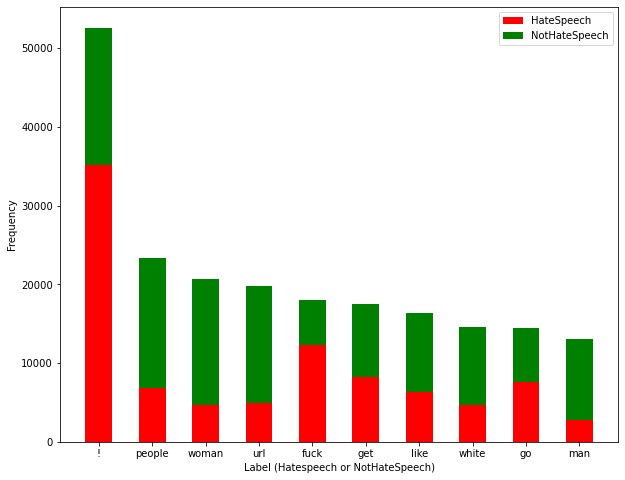

In [29]:
length=10
plot_words_label(word_list[0:length], hatespeech_freq[0:length],nothatespeech_freq[0:length], "most10frequent.png",0.5)

sayye
['gnr', 'prh', 'dmm', 'pjsseason', 'umar', 'sahela', 'kanhiyan', 'celiberity', 'richabharti', 'sayye']


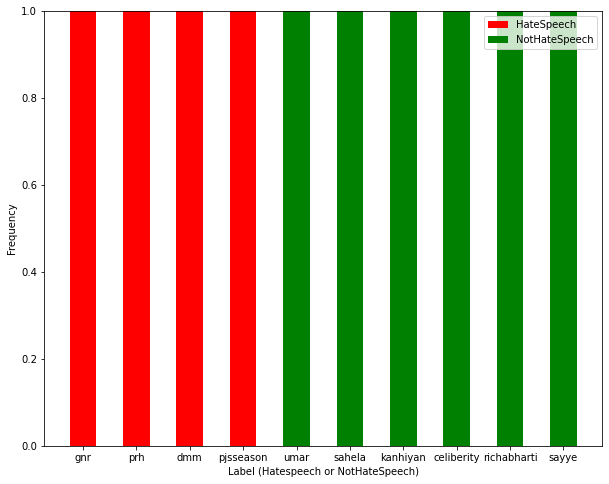

In [27]:
print(word_list[-1])
length=-10
print(word_list[-10:])
plot_words_label(word_list[length:], hatespeech_freq[length:],nothatespeech_freq[length:], "least10frequent.png",0.5)

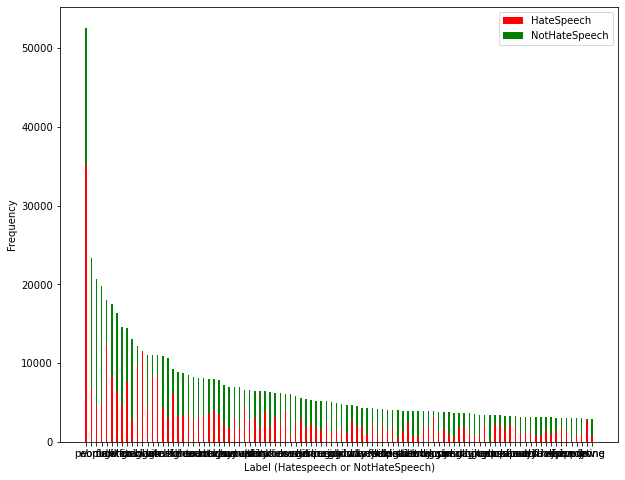

In [115]:
length=100
plot_words_label(word_list[0:length], hatespeech_freq[0:length],nothatespeech_freq[0:length], "most100frequent.png",0.3)

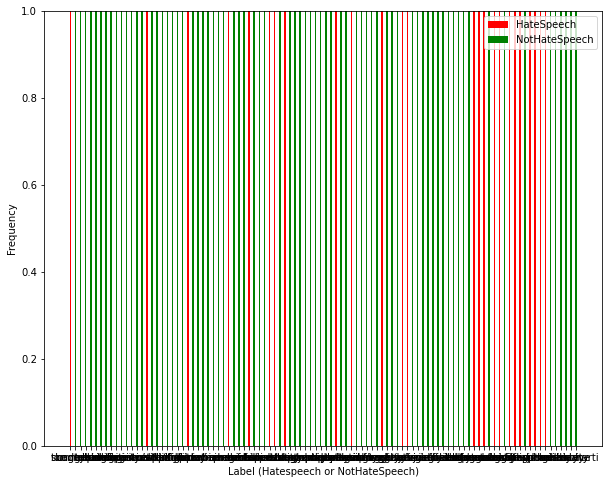

In [118]:
length=-100
plot_words_label(word_list[length:], hatespeech_freq[length:],nothatespeech_freq[length:], "least100frequent.png",0.3)

/home/cse/.conda/envs/gpunew/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # This is added back by InteractiveShellApp.init_path()
/home/cse/.conda/envs/gpunew/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


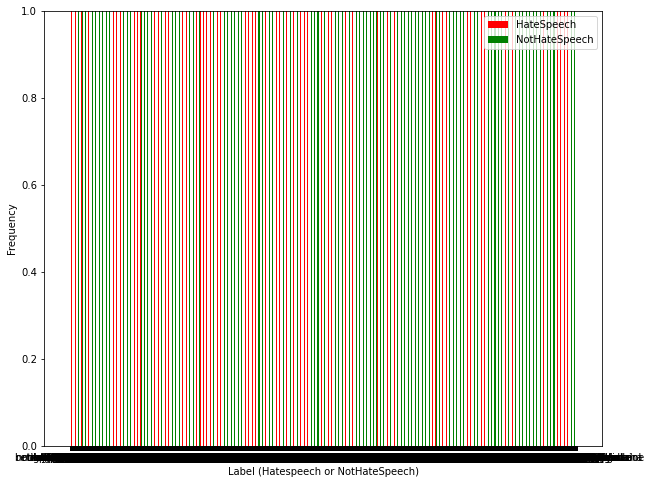

In [34]:
length=-10000
plot_words_label(word_list[length:], hatespeech_freq[length:],nothatespeech_freq[length:], "least10000frequent.png",0.3)

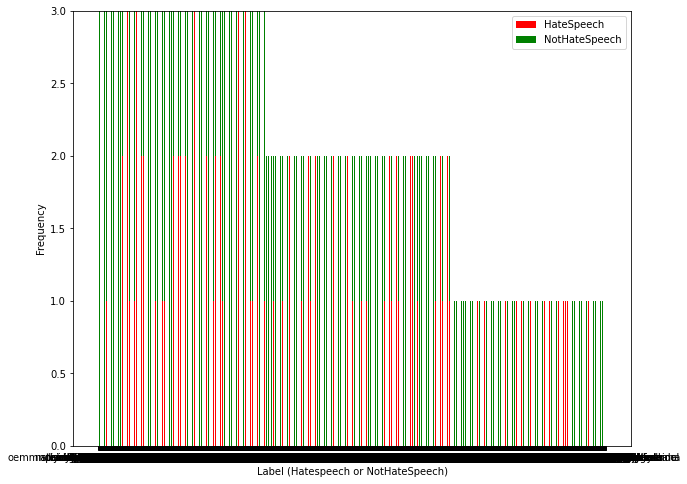

In [37]:
length=-15000
plot_words_label(word_list[length:], hatespeech_freq[length:],nothatespeech_freq[length:], "least15000frequent.png",0.3)

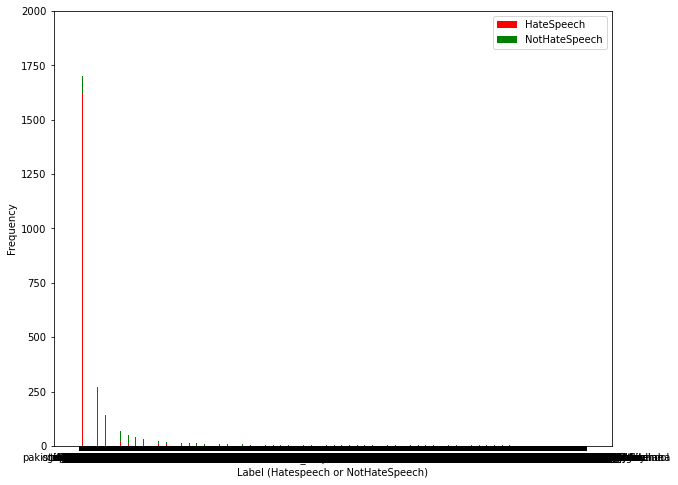

In [47]:
length=len(word_list)
plot_words_label(word_list[0:length], hatespeech_freq[0:length],nothatespeech_freq[0:length], "allwords_correlation_lim2000.png",0.1)

In [117]:
length=len(word_list)
plot_words_label(word_list[0:length], hatespeech_freq[0:length],nothatespeech_freq[0:length], "allwords_correlation_0.05.png",0.0.05)

SyntaxError: invalid syntax (<ipython-input-117-78bbfdb48ea1>, line 2)

In [103]:
 corr_word_label['gnr']

{'freq': 1, 'hatespeech': 1}

# Data Representation (Word2Vec): 


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.preprocess_data, df.hatespeech, test_size = 0.20, random_state = 25)

In [21]:
from gensim.models import Word2Vec
from ast import literal_eval

corpus=[]
for speech in df["preprocess_data"][:]:
    if (speech != []):
        corpus.append(literal_eval(speech)) # to convert "[yes,indeed,..]" to an actual list
corpus

[['yes',
  'indeed',
  'sort',
  'remind',
  'eld',
  'lady',
  'play',
  'part',
  'movie',
  'titanic',
  'telling',
  'story',
  '!',
  '!',
  '!',
  'want',
  'cover',
  'really',
  'be',
  '!',
  '!',
  'would',
  'proud',
  '!',
  '!',
  '!',
  '!',
  'proud',
  'race',
  'matter',
  'be',
  '!',
  '!'],
 ['trans', 'woman', 'read', 'tweet', 'right', 'beautiful'],
 ['question',
  'broad',
  'criticize',
  'america',
  'country',
  'flee',
  'get',
  'want',
  'make',
  'america',
  'like',
  'former',
  'hell',
  'hole',
  'think',
  'so',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  'let',
  'explain',
  'gratitude',
  'let',
  'country'],
 ['time',
  'illegal',
  'go',
  'back',
  'country',
  'origin',
  'keep',
  'freeway',
  'open',
  'prevent',
  'heavy',
  'traffic'],
 ['starter',
  'bend',
  'one',
  'pink',
  'kick',
  'ass',
  'pussy',
  'get',
  'taste',
  'begging',
  'dick',
  'inside'],
 ['sound',
  'like',
  'kinda',
  'wholsesome',
  'lif

In [19]:
df.dtypes

Unnamed: 0           int64
hatespeech         float64
text                object
preprocess_data     object
word_tfidf          object
dtype: object

In [24]:
import gensim
word2vecmodel = gensim.models.Word2Vec(corpus, min_count = 1, vector_size= 500)
word2vecmodel.save('word2vec.model')

In [27]:
X_train.index

Int64Index([ 26442,  91320,  76787,  73027,  96553,  54374,  70916,  61398,
            133642,  98753,
            ...
             85245,  99464,  21245, 121772,  35702, 130365,  92303,   6618,
             90430,  29828],
           dtype='int64', length=108444)

In [28]:
df.index

RangeIndex(start=0, stop=135556, step=1)

In [35]:
word2vecmodel.wv.most_similar('whore')

[('cunt', 0.8068694472312927),
 ('slut', 0.7818061113357544),
 ('lightly', 0.7296317219734192),
 ('skank', 0.7042859196662903),
 ('thot', 0.6997098922729492),
 ('dumpster', 0.6933637857437134),
 ('worthless', 0.6900025010108948),
 ('pathetic', 0.6869006752967834),
 ('toy', 0.6858779788017273),
 ('cumguzzle', 0.683261513710022)]

In [47]:
def generate_csv_from_word2vec(df, filename):
    idx = X_train.index[0]
    
    with open(filename, 'w+') as fhandle:
        header = ",".join(str(i) for i in range(500)) 
        fhandle.write(header+"\n")
        for index, row in df.iterrows():
#             for word in row['preprocess_data']:
#                 print(word)
#                 print(word2vecmodel.wv[word])
            word_vector = (np.mean([word2vecmodel.wv[word] for word in literal_eval(row['preprocess_data'])], axis=0)).tolist()              

            if type(word_vector) is list:  
                newRow = ",".join( [str(vector_element) for vector_element in word_vector] )
            else:
                newRow = ",".join([str(0) for i in range(500)])
            fhandle.write(newRow)
            fhandle.write('\n')

In [48]:
generate_csv_from_word2vec(pd.DataFrame(X_train), "word2vec_train.csv")

/home/cse/.conda/envs/gpunew/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cse/.conda/envs/gpunew/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [49]:
generate_csv_from_word2vec(pd.DataFrame(X_test), "word2vec_test.csv")

# Loading the Data 

In [ ]:
train_df= pd.read_csv("word2vec_train.csv")
train_df

In [ ]:
test_df= pd.read_csv("word2vec_test.csv")
test_df

# Logisitic Regression

In [63]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logregress_model=LogisticRegression(fit_intercept=True, max_iter=5000)
logregress_model=logregress_model.fit(train_df.values,y_train.values)
logress_results = logregress_model.predict(test_df.values)
print(classification_report(y_test.values,logress_results))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82     16018
         1.0       0.76      0.67      0.72     11094

    accuracy                           0.78     27112
   macro avg       0.78      0.77      0.77     27112
weighted avg       0.78      0.78      0.78     27112



In [68]:
from statistics import mean,stdev
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
logregress_kfold_res = cross_val_score(logregress_model, train_df.values, y_train, scoring='recall', cv=cv, n_jobs=-1)
# report performance
print('Logistic Regression Kfold recall: %.3f (%.3f)' % (mean(logregress_kfold_res), stdev(logregress_kfold_res)))

Logistic Regression Kfold recall: 0.672 (0.006)


# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(train_df.values,y_train.values)
dt_results = dt_model.predict(test_df.values)
print(classification_report(y_test.values,dt_results))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82     16018
         1.0       0.74      0.70      0.72     11094

    accuracy                           0.78     27112
   macro avg       0.77      0.77      0.77     27112
weighted avg       0.78      0.78      0.78     27112



In [71]:
from statistics import mean,stdev
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
dt_model_kfold_res = cross_val_score(dt_model, train_df.values, y_train, scoring='recall', cv=cv, n_jobs=-1)
# report performance
print('Decision Tree Kfold recall: %.3f (%.3f)' % (mean(dt_model_kfold_res), stdev(dt_model_kfold_res)))

Decision Tree Kfold recall: 0.704 (0.006)


# Perceptron

In [72]:
from sklearn.linear_model import Perceptron
perceptron_model = Perceptron(tol=1e-3, random_state=0)
perceptron_model.fit(train_df.values,y_train.values)
perceptron_result=perceptron_model.predict(test_df.values)
print(classification_report(y_test.values,perceptron_result))

              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79     16018
         1.0       0.73      0.57      0.64     11094

    accuracy                           0.74     27112
   macro avg       0.73      0.71      0.72     27112
weighted avg       0.74      0.74      0.73     27112



In [73]:
from statistics import mean,stdev
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
perceptron_model_kfold_res = cross_val_score(perceptron_model, train_df.values, y_train, scoring='recall', cv=cv, n_jobs=-1)
# report performance
print('Decision Tree Kfold recall: %.3f (%.3f)' % (mean(perceptron_model_kfold_res), stdev(perceptron_model_kfold_res)))

Decision Tree Kfold recall: 0.615 (0.207)


# Neural Network (Hidden Layer= 25)

In [58]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(25,),random_state=1, max_iter=5000, activation='logistic')
nn_model.fit(train_df.values,y_train.values)
nn_results = nn_model.predict(test_df.values)
print(classification_report(y_test.values,nn_results))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83     16018
         1.0       0.75      0.75      0.75     11094

    accuracy                           0.79     27112
   macro avg       0.79      0.79      0.79     27112
weighted avg       0.79      0.79      0.79     27112



In [74]:
from statistics import mean,stdev
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
nn_model_kfold_res = cross_val_score(nn_model, train_df.values, y_train, scoring='recall', cv=cv, n_jobs=-1)
# report performance
print('Neural Network 25 Hidden Layer Kfold recall: %.3f (%.3f)' % (mean(nn_model_kfold_res), stdev(nn_model_kfold_res)))

Neural Network 25 Hidden Layer Kfold recall: 0.717 (0.008)


# Neural Network (Hidden Layer= 25, numLayers=2)

In [79]:
from sklearn.neural_network import MLPClassifier
nn_model_2 = MLPClassifier(hidden_layer_sizes=(25,25,),random_state=1, max_iter=5000, activation='logistic')
nn_model_2.fit(train_df.values,y_train.values)
nn_2_results = nn_model_2.predict(test_df.values)
print(classification_report(y_test.values,nn_2_results))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83     16018
         1.0       0.76      0.73      0.75     11094

    accuracy                           0.80     27112
   macro avg       0.79      0.79      0.79     27112
weighted avg       0.80      0.80      0.80     27112



In [74]:
from statistics import mean,stdev
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
nn_model_kfold_res = cross_val_score(nn_model, train_df.values, y_train, scoring='recall', cv=cv, n_jobs=-1)
# report performance
print('Neural Network 25 Hidden Layer Kfold recall: %.3f (%.3f)' % (mean(nn_model_kfold_res), stdev(nn_model_kfold_res)))

Neural Network 25 Hidden Layer Kfold recall: 0.717 (0.008)


# Neural Network (Hidden Layer= 50)

In [57]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(50,),random_state=1, max_iter=5000, activation='logistic')
nn_model.fit(train_df.values,y_train.values)
nn_results = nn_model.predict(test_df.values)
print(classification_report(y_test.values,nn_results))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82     16018
         1.0       0.75      0.74      0.74     11094

    accuracy                           0.79     27112
   macro avg       0.78      0.78      0.78     27112
weighted avg       0.79      0.79      0.79     27112



# Neural Network (Hidden Layer=100)

In [10]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=1, max_iter=5000, activation='logistic')
nn_model.fit(train_df.values,y_train.values)
nn_results = nn_model.predict(test_df.values)
print(classification_report(y_test.values,nn_results))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82     16018
         1.0       0.74      0.73      0.74     11094

    accuracy                           0.79     27112
   macro avg       0.78      0.78      0.78     27112
weighted avg       0.79      0.79      0.79     27112



# Neural Network (Hidden Layer=100, Number of Hidden Layers=2)

In [80]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(100,100,),random_state=1, max_iter=5000, activation='logistic')
nn_model.fit(train_df.values,y_train.values)
nn_results = nn_model.predict(test_df.values)
print(classification_report(y_test.values,nn_results))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81     16018
         1.0       0.72      0.76      0.74     11094

    accuracy                           0.78     27112
   macro avg       0.77      0.78      0.77     27112
weighted avg       0.78      0.78      0.78     27112



# Neural Network (Hidden Layer= 500)

In [53]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(500,),random_state=1, max_iter=5000, activation='logistic')
nn_model.fit(train_df.values,y_train.values)
nn_results = nn_model.predict(test_df.values)


NameError: name 'classification_report' is not defined

In [55]:
print(classification_report(y_test.values,nn_results))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81     16018
         1.0       0.72      0.76      0.74     11094

    accuracy                           0.78     27112
   macro avg       0.78      0.78      0.78     27112
weighted avg       0.79      0.78      0.78     27112



# Neural Network (Hidden Layer= 200)

In [56]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(200,),random_state=1, max_iter=5000, activation='logistic')
nn_model.fit(train_df.values,y_train.values)
nn_results = nn_model.predict(test_df.values)
print(classification_report(y_test.values,nn_results))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82     16018
         1.0       0.74      0.73      0.73     11094

    accuracy                           0.78     27112
   macro avg       0.78      0.78      0.78     27112
weighted avg       0.78      0.78      0.78     27112



# SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel='linear')
svm_model_linear.fit(train_df.values,y_train.values)
svm_linear_results = svm_model.predict(test_df.values)
print(classification_report(y_test.values,svm_linear_results))

In [ ]:
from statistics import mean,stdev
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
svm_model_linear_kfold_res = cross_val_score(svm_model_linear, train_df.values, y_train, scoring='recall', cv=cv, n_jobs=-1)
# report performance
print('SVM Kfold recall: %.3f (%.3f)' % (mean(svm_model_linear_kfold_res), stdev(svm_model_linear_kfold_res)))

In [60]:
from sklearn.svm import SVC
svm_model = SVC(kernel='sigmoid')
svm_model.fit(train_df.values,y_train.values)
svm_results = svm_model.predict(test_df.values)
print(classification_report(y_test.values,svm_results))

              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68     16018
         1.0       0.54      0.54      0.54     11094

    accuracy                           0.62     27112
   macro avg       0.61      0.61      0.61     27112
weighted avg       0.62      0.62      0.62     27112



# Gaussian Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
guas_nb_model = GaussianNB()
guas_nb_model.fit(train_df.values,y_train.values)
guas_nb_results = guas_nb_model.predict(test_df.values)
print(classification_report(y_test.values,guas_nb_results))

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.78     16018
         1.0       0.69      0.65      0.67     11094

    accuracy                           0.74     27112
   macro avg       0.73      0.72      0.72     27112
weighted avg       0.73      0.74      0.73     27112



# Bernoulli Naive Bayes
Bernoulli Naive Bayes is used for binary features, that is 0 or 1. Given that our features are continuous, Bernoulli Naive Bayes does not fit our problem. 

In [13]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(train_df.values,y_train.values)
bernoulli_nb_results = bernoulli_nb_model.predict(test_df.values)
print(classification_report(y_test.values,bernoulli_nb_results))

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78     16018
         1.0       0.67      0.70      0.69     11094

    accuracy                           0.74     27112
   macro avg       0.73      0.73      0.73     27112
weighted avg       0.74      0.74      0.74     27112



# Multinomial Naive Bayes
Multinomial Naive Bayes is used for discrete features, those who have certain number of unique value. Keeping that in mind, Multinomial is not good for our problem

In [14]:
from sklearn.naive_bayes import MultinomialNB
multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(train_df.values,y_train.values)
multinomial_nb_results = multinomial_nb_model.predict(test_df.values)
print(classification_report(y_test.values,multinomial_nb_results))

ValueError: Negative values in data passed to MultinomialNB (input X)

# K-Nearest Neighbours
Even if  the knn algorithm gives high performance measures, it takes a lot of time in predicting the label as there is no training process. Given that the data is very large, it will take so much time to compute the distances between the inserted point and all the data points we have to predict the label. 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
row_count= 108444
optimal_k= int(sqrt(row_count))
knn_model= KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(train_df.values,y_train.values)
knn_results= knn_model.predict(test_df.values)
print(classification_report(y_test.values,knn_results))

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83     16018
         1.0       0.77      0.68      0.72     11094

    accuracy                           0.79     27112
   macro avg       0.78      0.77      0.77     27112
weighted avg       0.79      0.79      0.78     27112

